In [1]:
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [ ]:
df.c

In [ ]:
df['Hea']

In [2]:
df = pd.read_csv("../data/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (319795, 18)


In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.describe(include=  "all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
def convert_y(x):
    if x == "No":
        x = 0
    else:
        x = 1
    return x

In [7]:
df["HeartDisease"] = df["HeartDisease"].apply( lambda x: convert_y(x))

In [8]:
def label_transformation(x):
    le = LabelEncoder()
    le_encoded = le.fit_transform(x)
    return le_encoded

In [9]:
df_transformed = df.copy()

In [11]:
df_transformed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [12]:
categorical_columns = ["Smoking","AlcoholDrinking","Sex","Race", "PhysicalActivity"]
for x in categorical_columns:
    df_transformed[x] = label_transformation(df[x])

In [13]:
 df_transformed

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,0,55-59,5,Yes,1,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,0,80 or older,5,No,1,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,1,65-69,5,Yes,1,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,0,75-79,5,No,0,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,0,40-44,5,No,1,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,No,7.0,0.0,Yes,1,60-64,3,Yes,0,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,No,0.0,0.0,No,1,35-39,3,No,1,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,No,0.0,0.0,No,0,45-49,3,No,1,Good,6.0,No,No,No
319793,0,32.81,0,0,No,0.0,0.0,No,0,25-29,3,No,0,Good,12.0,No,No,No


In [14]:
scaler = StandardScaler()
df_transformed[["BMI","PhysicalHealth","MentalHealth"]] = scaler.fit_transform(df_transformed[["BMI","PhysicalHealth","MentalHealth"]])

In [15]:
df[["BMI","PhysicalHealth","MentalHealth"]].corr()

,BMI,PhysicalHealth,MentalHealth
BMI,1.000000,0.109788,0.064131
PhysicalHealth,0.109788,1.000000,0.287987
MentalHealth,0.064131,0.287987,1.000000


In [16]:
x_train, x_test, y_train, y_test = train_test_split( df_transformed[["BMI","PhysicalHealth","MentalHealth","Smoking","AlcoholDrinking","Sex","Race", "PhysicalActivity"]],
                                                 df_transformed["HeartDisease"],test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(255836, 8)
Shape of Test Xs:(63959, 8)
Shape of Training y:(255836,)
Shape of Test y:(63959,)


In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predicted_labels = model.predict(x_test)

In [18]:
model.score(x_test,y_test)

0.9133038352694695

In [19]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[58411,    14],
       [ 5531,     3]])

In [20]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[58411    14]
 [ 5531     3]]
Normalized confusion matrix
[[1.00e+00 2.40e-04]
 [9.99e-01 5.42e-04]]


/var/folders/gw/nlwybk3j1xg2460c9jy7tm900000gn/T/ipykernel_83097/496140231.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


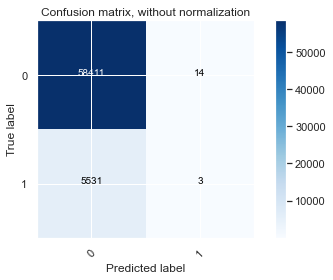

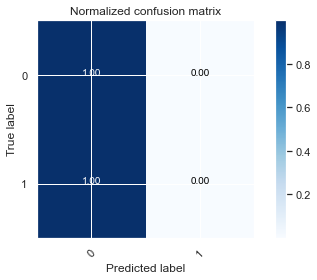

In [21]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['BMI', 'PhysicalHealth','MentalHealth']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Smoking', 'AlcoholDrinking', 'Sex','Race','PhysicalActivity']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


In [23]:
x_train, x_test, y_train, y_test = train_test_split( df[["BMI","PhysicalHealth","MentalHealth","Smoking","AlcoholDrinking","Sex","Race", "PhysicalActivity"]],
                                                 df["HeartDisease"],test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(255836, 8)
Shape of Test Xs:(63959, 8)
Shape of Training y:(255836,)
Shape of Test y:(63959,)


In [24]:
clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.913


In [25]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__solver': ["newton-cg","lbfgs", "liblinear", "sag", "saga"],
    'classifier__max_iter' :[100,150,200]
}

grid_search = GridSearchCV(clf, param_grid, cv=2, verbose= 2 , n_jobs = -1)
grid_search.fit(x_train, y_train)

print(("best Logistic Regression from grid search: %.3f"
       % grid_search.score(x_test, y_test)))

Fitting 2 folds for each of 30 candidates, totalling 60 fits


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

best Logistic Regression from grid search: 0.913


In [30]:
grid_search

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['BMI',
                                                                          'PhysicalHealth',
                                                                          'MentalHealth']),
                                                                        ('cat',
                                                                         Pipelin

In [26]:
grid_search.best_params_

{'classifier__max_iter': 100,
 'classifier__solver': 'newton-cg',
 'preprocessor__num__imputer__strategy': 'mean'}

In [27]:
import joblib

In [28]:
joblib.dump(grid_search, "logistic_model.md")

['logistic_model.md']

In [32]:
test_model = joblib.load('logistic_model.md')

In [33]:
y_prediction = test_model.predict(x_test)
y_prediction[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)
cnf_matrix

array([[58411,    14],
       [ 5531,     3]])

Confusion matrix, without normalization
[[58411    14]
 [ 5531     3]]
Normalized confusion matrix
[[1.00e+00 2.40e-04]
 [9.99e-01 5.42e-04]]


/var/folders/gw/nlwybk3j1xg2460c9jy7tm900000gn/T/ipykernel_83097/496140231.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


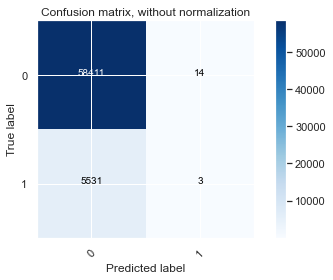

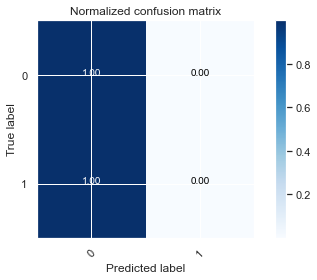

[CV] END classifier__max_iter=100, classifier__solver=liblinear, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END classifier__max_iter=100, classifier__solver=sag, preprocessor__num__imputer__strategy=mean; total time=   9.0s
[CV] END classifier__max_iter=150, classifier__solver=saga, preprocessor__num__imputer__strategy=mean; total time=  13.6s
[CV] END classifier__max_iter=100, classifier__solver=liblinear, preprocessor__num__imputer__strategy=median; total time=   2.3s
[CV] END classifier__max_iter=100, classifier__solver=sag, preprocessor__num__imputer__strategy=median; total time=   9.0s
[CV] END classifier__max_iter=150, classifier__solver=saga, preprocessor__num__imputer__strategy=mean; total time=  13.6s
[CV] END classifier__max_iter=100, classifier__solver=liblinear, preprocessor__num__imputer__strategy=mean; total time=   2.2s
[CV] END classifier__max_iter=100, classifier__solver=sag, preprocessor__num__imputer__strategy=mean; total time=   9.3s
[CV] END

In [35]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()